# Cavity QED with standing wave feedback

$$\def\ket#1{\left|#1\right\rangle}
\def\timedel#1{\left(\tilde{t}-\tilde{\tau}_{#1}\right)}$$

## Model

A cavity of length $L$ and frequency $\omega_0$ is coupled to the outside world with a semitransparent mirror. The output field is reflected back from a perfectly reflecting mirror at distance $L'$. This induces a time-delayed feedback of the output signal into the cavity in the form

\begin{align}
G_k(t) = G_0\sin{(q_kL)}e^{i(\omega_0-\omega_k)t} = G_0(-1)^ke^{-i\omega_k^\prime t}
\end{align}
where
\begin{align}
\omega_k^\prime &= \frac{(2k+1)\pi}{\tau}\\
\tau &= \frac{2L}{c}
\end{align}

A two level system is interacting with the resonant cavity mode with a coupling strength $\gamma$. 
Everything is considered in the interaction picture, where the Hamiltonian can be expressed as
\begin{align}
H = -\hbar\gamma(\sigma^-a^\dagger + \sigma^+a) - \hbar\sum_{k=0}^\infty\left[G_k(t)a^\dagger d_k + G_k^*(t)d_k^\dagger a\right]
\end{align}

## One-excitation manifold

The considered wave function has the form
$$\ket{\psi}=c_e(t)\ket{e,0,\{0\}}+c_g(t)\ket{g,1,\{0\}}+\sum_kc_{g,k}(t)\ket{g,0,\{k\}}$$

## Equations of motion

\begin{align}
\partial_t c_e &= i\gamma c_g(t)\\
\partial_t c_g &= i\gamma c_e(t) - \underbrace{|G_0|^2\tau}_{2\kappa}\sum_{k=0}^{\infty}(-1)^kc_g(t-k\tau)\Theta(t-k\tau)
\end{align}


In [1]:
#%matplotlib inline
from math import *
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from pydelay import dde23

In [2]:
print(np.sin(3*np.pi/4)**2,np.exp(1j*np.pi/4))

(0.5000000000000001, (0.7071067811865476+0.7071067811865475j))


In [12]:
eqnsST1 = {
    'ce:c' : '(ii*gam)*cg',
    'cg:c' : '(ii*gam)*ce - 2*kap*(cg-exp(ii*phi)*cg(t-tau)*heavi(t-tau))- kap1*cg'
    }

eqnsSTnofb = {
    'ce:c' : '(ii*gam)*cg',
    'cg:c' : '(ii*gam)*ce - 2*kap*cg- kap1*cg'
    }

eqnsSTmany = {
    'ce:c' : '(ii*gam)*cg',
    'cg:c' : '(ii*gam)*ce - kap1*cg - kap*4*s*(0.5*cg+cg(t-tau)*heavi(t-tau)+cg(t-2*tau)*heavi(t-2*tau)\
    +cg(t-3*tau)*heavi(t-3*tau)+cg(t-4*tau)*heavi(t-4*tau)+cg(t-5*tau)*heavi(t-5*tau)\
    +cg(t-6*tau)*heavi(t-6*tau)+cg(t-7*tau)*heavi(t-7*tau)+cg(t-8*tau)*heavi(t-8*tau)\
    +cg(t-9*tau)*heavi(t-9*tau)+cg(t-10*tau)*heavi(t-10*tau)+cg(t-11*tau)*heavi(t-11*tau)\
    +cg(t-12*tau)*heavi(t-12*tau)+cg(t-13*tau)*heavi(t-13*tau)+cg(t-14*tau)*heavi(t-14*tau)\
    +cg(t-15*tau)*heavi(t-15*tau)+cg(t-16*tau)*heavi(t-16*tau)+cg(t-17*tau)*heavi(t-17*tau)\
    +cg(t-18*tau)*heavi(t-18*tau)+cg(t-19*tau)*heavi(t-19*tau)+cg(t-20*tau)*heavi(t-20*tau)\
    +cg(t-21*tau)*heavi(t-21*tau)+cg(t-22*tau)*heavi(t-22*tau)+cg(t-23*tau)*heavi(t-23*tau)\
    +cg(t-24*tau)*heavi(t-24*tau)+cg(t-25*tau)*heavi(t-25*tau)+cg(t-26*tau)*heavi(t-26*tau)\
    +cg(t-27*tau)*heavi(t-27*tau)+cg(t-28*tau)*heavi(t-28*tau)+cg(t-29*tau)*heavi(t-29*tau)\
    +cg(t-30*tau)*heavi(t-30*tau)+cg(t-31*tau)*heavi(t-31*tau)+cg(t-32*tau)*heavi(t-32*tau)\
    +cg(t-33*tau)*heavi(t-33*tau)+cg(t-34*tau)*heavi(t-34*tau)+cg(t-35*tau)*heavi(t-35*tau)\
    +cg(t-36*tau)*heavi(t-36*tau)+cg(t-37*tau)*heavi(t-37*tau)+cg(t-38*tau)*heavi(t-38*tau)\
    +cg(t-39*tau)*heavi(t-39*tau)+cg(t-40*tau)*heavi(t-40*tau))'
    }
    
paramsST = {
            'gam' : 1.,
            'kap' : 1.,
            'tau' : np.pi/2,#np.pi/3,
            'kap1': 0.,#1.,
            's'   : np.sin(np.pi/2.)**2,
            'phi' : np.pi
                        }

mycode = """
double heavi(double t) {
    if(t>=0)
        return 1.0;
    else
        return 0.0;
}
"""

howlong=40
dt=0.0001
ddeST1 = dde23(eqns=eqnsST1, params=paramsST, supportcode=mycode)
ddeST1.set_sim_params(tfinal=howlong*paramsST['tau'], dtmax=dt)
ddeSTnofb = dde23(eqns=eqnsSTnofb, params=paramsST, supportcode=mycode)
ddeSTnofb.set_sim_params(tfinal=howlong*paramsST['tau'], dtmax=dt)
ddeSTmany = dde23(eqns=eqnsSTmany, params=paramsST, supportcode=mycode)
ddeSTmany.set_sim_params(tfinal=howlong*paramsST['tau'], dtmax=dt)

In [13]:
histfuncST = { 'ce': lambda t: 1,
             'cg': lambda t: 0
             }
ddeST1.hist_from_funcs(histfuncST, 51)
ddeSTnofb.hist_from_funcs(histfuncST, 51)
ddeSTmany.hist_from_funcs(histfuncST, 51)

In [14]:
ddeST1.run()
ddeSTnofb.run()
ddeSTmany.run()

In file included from /home/niki/.local/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1821:0,
                 from /home/niki/.local/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/niki/.local/lib/python2.7/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /home/niki/.cache/weave/python27_compiled/sc_597bd5e2c1c3014033fc01654e2549080.cpp:22:
/home/niki/.local/lib/python2.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^~~~~~~
In file included from /home/niki/.local/lib/python2.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1821:0,
                 from /home/niki/.local/lib/python2.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/n

/home/niki/.local/lib/python2.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/niki/.local/lib/python2.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/niki/.local/lib/python2.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


0.9588347073787107


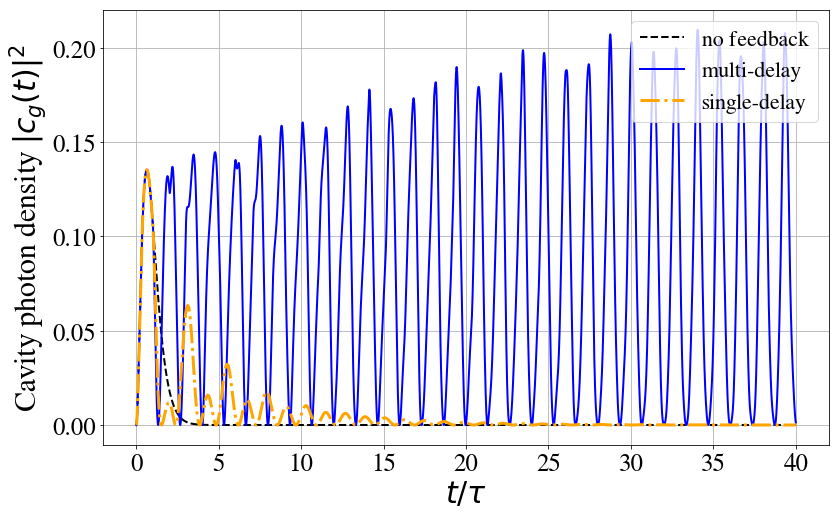

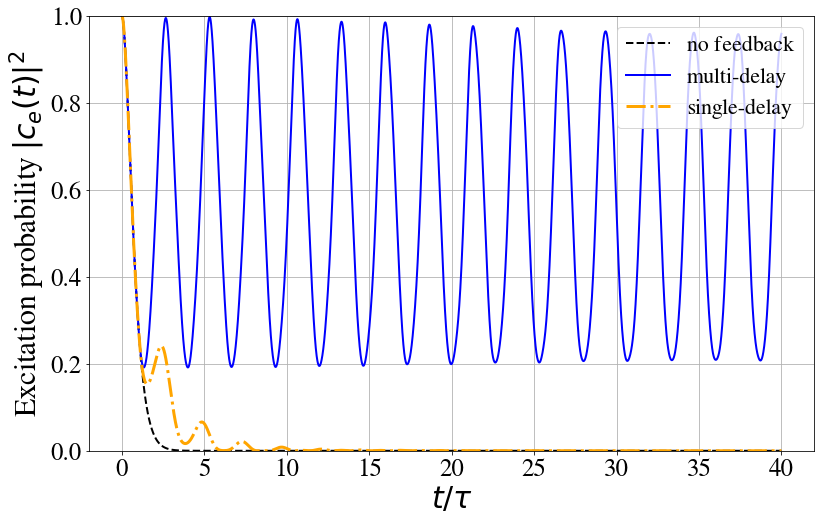

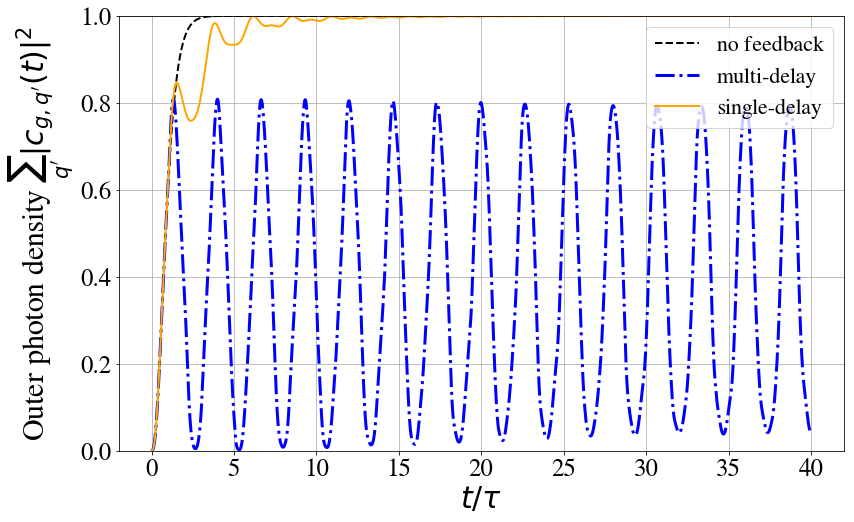

In [15]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

sol1 = ddeST1.sample(0,howlong*paramsST['tau'],dt)
tST1  = sol1['t']/paramsST['tau']
ceST1 = sol1['ce']
cgST1 = sol1['cg']
solnofb = ddeSTnofb.sample(0,howlong*paramsST['tau'],dt)
tSTnofb  = solnofb['t']/paramsST['tau']
ceSTnofb = solnofb['ce']
cgSTnofb = solnofb['cg']
solmany = ddeSTmany.sample(0,howlong*paramsST['tau'],dt)
tSTmany  = solmany['t']/paramsST['tau']
ceSTmany = solmany['ce']
cgSTmany = solmany['cg']

fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
plt.plot(tSTnofb,np.abs(cgSTnofb)**2,linewidth=2.0,label='no feedback',color='k',ls='--')
plt.hold(True)
plt.plot(tSTmany,np.abs(cgSTmany)**2,linewidth=2.0,label='multi-delay',color='b',ls='-')
plt.plot(tST1,np.abs(cgST1)**2,linewidth=3.0,label='single-delay',color = 'orange',ls="-.")
plt.xlabel('$t/\\tau$',fontsize=30.)
#plt.xlim(4.0,4.07)
#plt.xlim(1.,20)
plt.ylabel('Cavity photon density $|c_g(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)
plt.figure(2,figsize=(13,8))
plt.plot(tSTnofb,np.abs(ceSTnofb)**2,linewidth=2.0,label='no feedback',color='k',ls='--')
plt.hold(True)
plt.ylim(0,1)
#plt.xlim(0.,0.1)
print(np.abs(ceSTmany[-1])**2)
plt.plot(tSTmany,np.abs(ceSTmany)**2,linewidth=2.0,label='multi-delay',color='b',ls='-')
plt.plot(tST1,np.abs(ceST1)**2,linewidth=3.0,label='single-delay',color = 'orange',ls="-.")
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Excitation probability $|c_e(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
#plt.xlim(0,3)
#plt.xlim(0,10)
plt.grid(True)
plt.figure(3,figsize=(13,8))
plt.plot(tSTnofb,1-(np.abs(ceSTnofb)**2+np.abs(cgSTnofb)**2),linewidth=2.0,label='no feedback',color='k',ls='--')
plt.hold(True)
plt.ylim(0,1)
#plt.xlim(1.99,2.01)
plt.plot(tSTmany,1-(np.abs(ceSTmany)**2+np.abs(cgSTmany)**2),linewidth=3.0,label='multi-delay',color='b',ls='-.')
plt.plot(tST1,1-(np.abs(ceST1)**2+np.abs(cgST1)**2),linewidth=2.0,label='single-delay',color = 'orange')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Outer photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
#plt.xlim(0,10)
#plt.xlim(0,3)
plt.grid(True)
plt.show()

('changing gamma', array([ 0.41318681,  3.02564102]))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

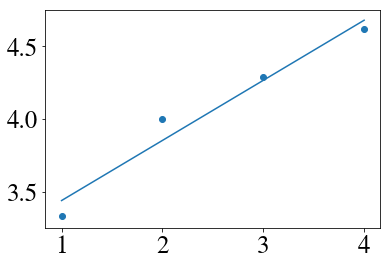

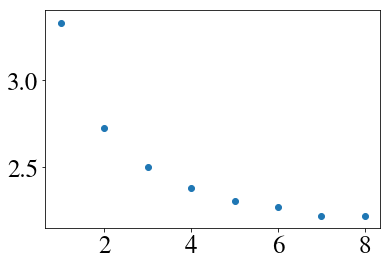

In [90]:
x_gam = np.array([1,2,3,4])
y_gam = np.array([10/3., 4., 30/7., 60/13.])
plt.figure(1)
plt.scatter(x_gam,y_gam)
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x+b
popt_gam, pcov_gam = curve_fit(func, x_gam, y_gam)
print("changing gamma",popt_gam)
plt.plot(x_gam,popt_gam[0]*x_gam+popt_gam[1])

def func2(x, a, b,c):
    return a*np.exp(b*x)+c
x_kap = np.array([1,2,3,4,5,6,7,8])
y_kap = np.array([10/3., 30/11., 2.5, 50/21., 30/13., 25/11., 20/9., 20/9.])
plt.figure(2)
plt.scatter(x_kap,y_kap)
popt_kap, pcov_kap = curve_fit(func2, x_kap, y_kap)
print("changing kappa",popt_kap)
#plt.plot(x_kap,popt_kap[0]*x_kap+popt_kap[1])


## Numerics

In [17]:
a=2
b=2

m = np.array([[1,2,3,4],[4,5,3,4],[5,6,7,8],[4,6,3,8]])
print(m[:,1])

if a==2 and b==3: 
    print("true")
elif a==4 and b==2:
    print("nice try")
elif (a==4 and b==3) or (a==2 and b==2):
    print("you got this")

[2 5 6 6]
you got this


In [21]:
#Defining equations
import numpy as np
from scipy.integrate import ode

N  = 100 # At least 100 is required for a good precision (150-200 better but slower)
qp = np.linspace(-N/2,N/2,N+1)
#print(qp[0:N+3])

y0, t0 = [1.0, 0.0]+ np.zeros(N+1).tolist(), 0

#arg: 0->gam, 1->s, 2->G0, 3->tau
def f(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[3])
    return [1j*arg[0]*y[1], 1j*arg[0]*y[0]-arg[4]*y[1]+1j*arg[1]*arg[2]*np.sum(qpcoef*y[2:N+3])] + \
(1j*y[1]*arg[1]*arg[2]*np.conjugate(qpcoef)).tolist()
def jac(t, y, arg):
    qpcoef = (-1)**qp * np.exp(-1j*2*np.pi*qp*t/arg[3])
    jacobian = np.zeros((N+3,N+3),'complex')
    jacobian[0:2,0:2] = np.array([[0.,1j*arg[0]],[1j*arg[0],-arg[4]]])
    jacobian[0,2:N+3] = np.zeros(N+1)
    jacobian[2:N+3,0] = np.zeros(N+1)
    jacobian[1,2:N+3] = 1j*qpcoef*arg[1]*arg[2]
    jacobian[2:N+3,1] = 1j*arg[1]*arg[2]*np.conjugate(qpcoef)
    jacobian[2:N+3,2:N+3] = np.zeros((N+1,N+1))
    return jacobian.tolist()

In [ ]:
r = ode(f, jac).set_integrator('zvode', method='bdf', with_jacobian=True)
phi = np.pi
s = np.sin(phi/2)
kap = 1.
kap1 = 0.#1.
tau = np.pi#/3.
G0 = 2*np.sqrt(kap/tau) #See notes for the connection between kappap and G0 (assumed to be real)
gam = 1.
arg = [gam,s,G0,tau,kap1]
r.set_initial_value(y0, t0).set_f_params(arg).set_jac_params(arg)
t1 = 100.*tau
dt = 0.01

time = np.array([t0/tau])
#print(time)
sol  = np.array([y0])
#print(sol)
while r.successful() and r.t < t1:
#    print(r.t/tau,t1/tau,r.y[0])
    r.integrate(r.t+dt)
    #print(r.t/arg[2])
    #print(r.y)
    time = np.append(time, np.array([r.t/tau]), axis=0)
    sol  = np.append(sol, np.array([r.y]), axis=0)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

env = np.zeros(len(time))
for ti in range(0,len(time)):
    env[ti] = np.sum(np.abs(sol[ti,2:(N+3)])**2)
fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
plt.ylim(0,1.1)
plt.plot(time,env+np.abs(sol[:,1])**2+np.abs(sol[:,0])**2,linewidth=4.0,label='norm',color='green',ls='-')
plt.hold(True)
plt.plot(time,env,linewidth=2.0,label='$\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',color='k',ls='--')
plt.plot(time,np.abs(sol[:,1])**2,linewidth=2.0,label='$|c_g(t)|^2$',color = 'orange')
plt.plot(time,np.abs(sol[:,0])**2,linewidth=3.0,label='$|c_e(t)|^2$',color='b',ls='-.')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.xlim(0,40)
plt.ylabel('Populations',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)
plt.show()
plt.figure(2,figsize=(13,8))
plt.clf()
plt.plot(time,np.abs(sol[:,1])**2,linewidth=2.0,label='$|c_g(t)|^2$',color = 'orange')
plt.xlabel('$t/\\tau$',fontsize=30.)
#plt.xlim(0,3)
plt.ylabel('Excitations',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)
plt.show()

## Theoretical prediction for weak coupling

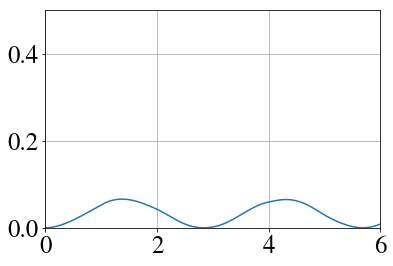

In [112]:
from decimal import Decimal
from __future__ import division

t=time*tau
cg = 1j*t*np.exp(t)
power= np.zeros(len(t),dtype=np.float64)
for p in range(0,7):
    logic = np.zeros(len(t))
    ind = np.argmax(t>=p*tau)
    logic[ind:] = np.ones(len(t)-ind)
    #print(logic)
    for m in range(1,70):
        for l in range(0,m+1):
#            print(p,m,l)
            binom1=1.
            binom2=1.
            for i in range(1,l+1):
                binom1 *= float(Decimal(m+1-i)/Decimal(i))
#                print(binom1)
#            print(binom1)
            for k in range(1,p+1):
                binom2 *= float(Decimal(m+p-k)/Decimal(k))
#            print(binom2)
#            fact = float(m*Decimal(factorial(p+m-1))/Decimal(factorial(p))/Decimal(factorial(l))/\
#            Decimal(factorial(m-l)))
            power = (t-p*tau)**(m+l+1)/float(Decimal(factorial(m+l+1)))
            #print(power)
            new = 1j*(-4)**m * binom1 * binom2 * power * np.exp(t-p*tau)
#            print(new)
            cg += logic*new
plt.plot(time,np.abs(cg)**2)
plt.xlim(0,6)
plt.grid(True)
plt.ylim(0,0.5)
plt.show()

## Comparison between analytics and numerics

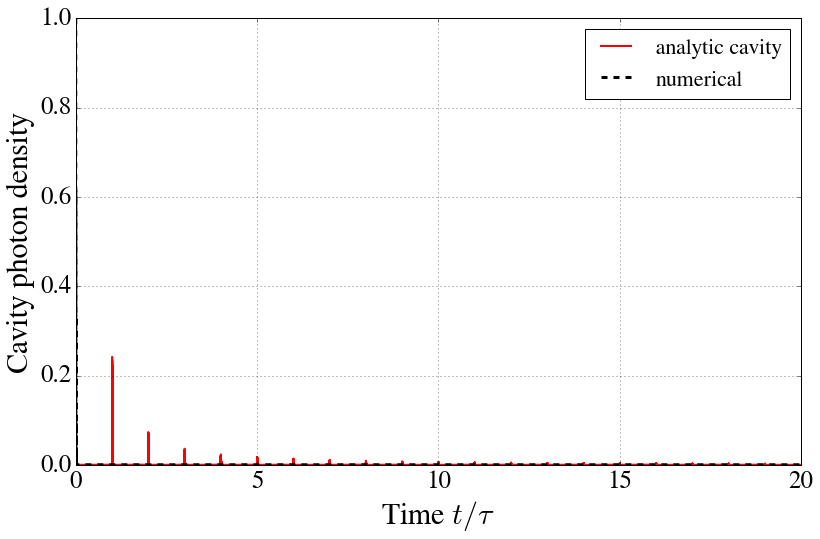

In [50]:
plt.figure(1,figsize=(13,8))
#plt.plot(tSTmany,np.abs(ceSTmany)**2,linewidth=2.0,label='analytic atomic',color='orange',ls='-')
#plt.plot(time,np.abs(sol[:,0])**2,linewidth=3.0,label='numerical atomic',color='b',ls='-.')
plt.plot(tSTmany,np.abs(ceSTmany)**2,linewidth=2.0,label='analytic cavity',color='r',ls='-')
#plt.plot(time,np.abs(cg)**2,linewidth=3.0,label='analytic',color='b',ls='-.')
plt.hold(True)
plt.plot(time,np.abs(sol[:,0])**2,linewidth=3.0,label='numerical',color='k',ls='--')
plt.grid(True)
plt.xlabel("Time $t/\\tau$",fontsize=30)
plt.ylabel("Cavity photon density",fontsize=30)
plt.legend(loc="upper right",fontsize=22)
plt.xlim(0,20)
plt.ylim(0,1)
plt.show()

In [10]:
a = np.linspace(-10,10,11)
a[0:10]

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.])

## Spontaneous emission spectra

/home/nnem614/Documents/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
/home/nnem614/Documents/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in divide


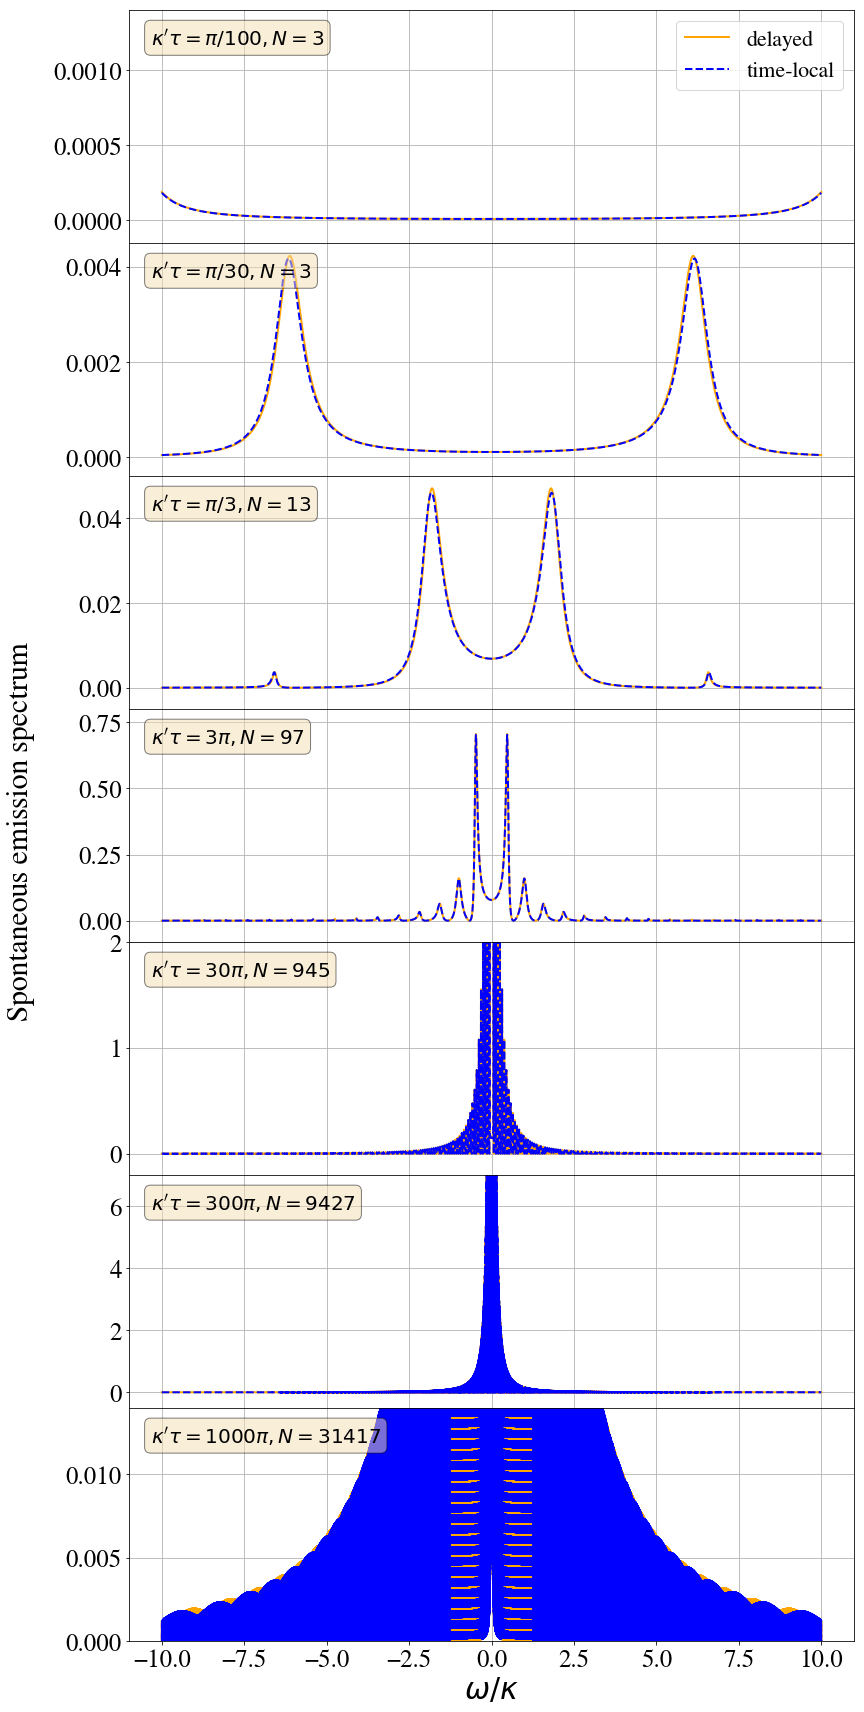

In [6]:
#Finite number of modes -> shorter fibre

from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

kap1 = 1
kap = 1.
gam = 1.

om = np.linspace(-10.,10.,1000000)
def Spontem_d(om,N,tau):
    
    qp  = np.linspace(-N/2,N/2,N+1)
    Kd  = np.sum(1/(om*tau-2*qp*np.pi))   
    cg1 = 1j*gam/(-om**2+gam**2+4*kap*om*Kd-kap1*1j*om)
    
    Kdc = np.sum(np.exp(1j*om*tau*qp[(N/2):(N+1)]))-1/2.
    #cg1c = 1j*gam/(-om**2+gam**2-4*kap*1j*om*Kdc-kap1*1j*om)
    cg1c = 1j*gam/(-om**2+gam**2+2*kap*om/np.tan(om*tau/2.)-kap1*1j*om)
    return cg1,cg1c

cg1 = np.zeros(len(om),"complex")
cg1c = np.zeros(len(om),"complex")
taar = np.array([100.,30.,3.,1/3.,1/30.,1/300.,1/1000.])
tau = np.pi/taar
f, axes = plt.subplots(len(tau), sharex=True,figsize=(13,30))
#plt.clf()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for itau in range(0,len(tau)):
    N  = int(ceil(10*kap*tau[itau]/2.))*2 #matches with 100*kap*tau/2
    if itau <3:
        textstr = '$\kappa^\prime\\tau=\pi/%.0f, N=%d$'% (taar[itau],N+1)
    else:
        textstr = '$\kappa^\prime\\tau=%.0f\pi, N=%d$'% (1/taar[itau],N+1)
    for iom in range(0,len(om)):
        cg1[iom],cg1c[iom] = Spontem_d(om[iom],N,tau[itau])
#plt.figure(1,figsize=(13,8))
#plt.ylim(0,0.02)
#plt.xlim(-500,500)
    axes[itau].text(0.03, 0.93, textstr, transform=axes[itau].transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
#    if itau<len(tau)-1:
#        axes[itau].plot(om,(kap2-kapi)/np.pi*np.abs(cg2)**2,linewidth=2.0,label='right (2)',color = 'orange')
#        axes[itau].hold(True)
#        axes[itau].plot(om,(kap1-kapi)/np.pi*np.abs(cg1)**2,linewidth=2.0,label='left (1)',color='k',ls='--')
#    else:
    axes[itau].plot(om,kap1/2./np.pi*np.abs(cg1c)**2,linewidth=2.0,label='delayed',color = 'orange')
    axes[itau].hold(True)
    axes[itau].plot(om,kap1/2./np.pi*np.abs(cg1)**2,linewidth=2.0,label='time-local',color = 'b',ls='--')
    #axes[itau].set_ylabel('Spontaneous emission spectra',fontsize=30.)
    axes[itau].grid(True)
#axes[0].set_ylim(-0.00015,.0014)
#axes[1].set_ylim(-0.0004,.0045)
#axes[2].set_ylim(-0.005,.05)
#axes[3].set_ylim(-0.08,.8)
#axes[4].set_ylim(-0.2,2.)
#axes[5].set_ylim(-0.5,7)
#axes[6].set_ylim(0.,0.014)
#axes[0].set_xlim(-120,120)
f.text(0.01, 0.5, 'Spontaneous emission spectrum', ha='center', va='center', rotation='vertical',fontsize=30.)
f.subplots_adjust(hspace=0)
axes[6].set_xlabel('$\omega/\kappa$',fontsize=30.)
axes[0].legend(loc='upper right',fontsize = 22)
#axes[-1].legend(loc='upper right',fontsize = 22)
plt.show()

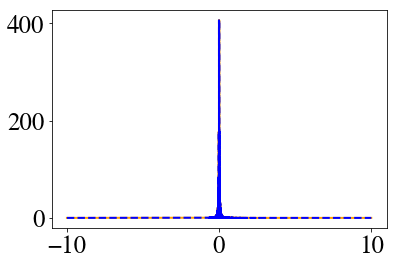

In [9]:
plt.plot(om,kap1/2./np.pi*np.abs(cg1c)**2,linewidth=2.0,label='delayed',color = 'orange')
plt.plot(om,kap1/2./np.pi*np.abs(cg1)**2,linewidth=2.0,label='time-local',color = 'b',ls='--')
plt.show()

In [ ]:
#Finite number of modes -> shorter fibre

from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

kap1 = 1
kap = 1.
gam = 1.

om = np.linspace(-20.,20.,10000000)
def Spontem_d(om,N,tau):
    
    cg_nofb = 1j*gam/(-om**2+gam**2-(kap1+2*kap)*1j*om)
    cg_sing = 1j*gam/(-om**2+gam**2-1j*om*2*kap*(1-np.exp(1j*om*tau))-1j*om*kap1)
    cg_mult = 1j*gam/(-om**2+gam**2+2*kap*om/np.tan(om*tau/2.)-kap1*1j*om)
    return cg_nofb, cg_sing, cg_mult

cg_nofb = np.zeros(len(om),"complex")
cg_sing = np.zeros(len(om),"complex")
cg_mult = np.zeros(len(om),"complex")
taar = np.array([100.,30.,3.,1/3.,1/30.,1/300.,1/1000.])
#taar = np.array([1/300.,1/1000., 1/3000.,1/9000.,1/30000.])
tau = np.pi/taar
f, axes = plt.subplots(len(tau), sharex=True,figsize=(13,30))
#plt.clf()
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for itau in range(0,len(tau)):
    N  = int(ceil(10*kap*tau[itau]/2.))*2
    if itau <3:
        textstr = '$\kappa^\prime\\tau=\pi/%.0f$'% (taar[itau])
    else:
        textstr = '$\kappa^\prime\\tau=%.0f\pi$'% (1/taar[itau])
    for iom in range(0,len(om)):
        cg_nofb[iom],cg_sing[iom],cg_mult[iom] = Spontem_d(om[iom],N,tau[itau])
#plt.figure(1,figsize=(13,8))
#plt.ylim(0,0.02)
#plt.xlim(-500,500)
    axes[itau].text(0.03, 0.93, textstr, transform=axes[itau].transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
#    if itau<len(tau)-1:
#        axes[itau].plot(om,(kap2-kapi)/np.pi*np.abs(cg2)**2,linewidth=2.0,label='right (2)',color = 'orange')
#        axes[itau].hold(True)
#        axes[itau].plot(om,(kap1-kapi)/np.pi*np.abs(cg1)**2,linewidth=2.0,label='left (1)',color='k',ls='--')
#    else:
    axes[itau].plot(om,kap1/2./np.pi*np.abs(cg_mult)**2,linewidth=2.0,label='multidelay',color = 'b',ls='-')
    axes[itau].plot(om,kap1/2./np.pi*np.abs(cg_nofb)**2,linewidth=2.0,label='no feedback',color ="k",ls = '--')
    axes[itau].plot(om,kap1/2./np.pi*np.abs(cg_sing)**2,linewidth=2.0,label='single delay',color ="orange",ls = '-.')
    #axes[itau].set_ylabel('Spontaneous emission spectra',fontsize=30.)
    axes[itau].grid(True)
#axes[0].set_ylim(-0.00015,.0014)
#axes[1].set_ylim(-0.0004,.0045)
#axes[2].set_ylim(-0.005,.05)
#axes[3].set_ylim(-0.08,.8)
#axes[4].set_ylim(-0.2,2.)
#axes[5].set_ylim(-0.5,7)
#axes[6].set_ylim(0.,0.014)
#axes[0].set_xlim(-120,120)
f.text(0.01, 0.5, 'Spontaneous emission spectrum', ha='center', va='center', rotation='vertical',fontsize=30.)
f.subplots_adjust(hspace=0)
axes[len(tau)-1].set_xlabel('$\omega/\kappa$',fontsize=30.)
axes[0].legend(loc='upper right',fontsize = 22)
#axes[-1].legend(loc='upper right',fontsize = 22)
plt.show()

KeyboardInterrupt: 